#Ques-2#

##Question-1 Copied as It is used to solve this .


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
np.random.seed(999)

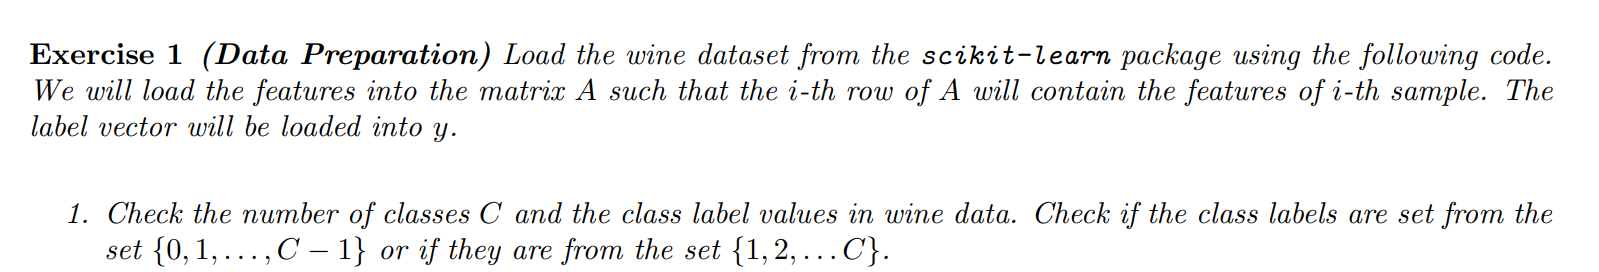

In [28]:

#we will load the wine data from scikit - learn package
from sklearn . datasets import load_wine
wine=load_wine()
# check the shape of wine data
print (wine. data . shape )
A = wine.data
# check the shape  of target
print ( wine.target.shape )

#How many labels does wine data have ?
#Number of labels
C= np.unique(wine.target)
print('labels;',C)
print ('Number of lablels:',len(C))


(178, 13)
(178,)
labels; [0 1 2]
Number of lablels: 3


The labels are from C={0,1,2}

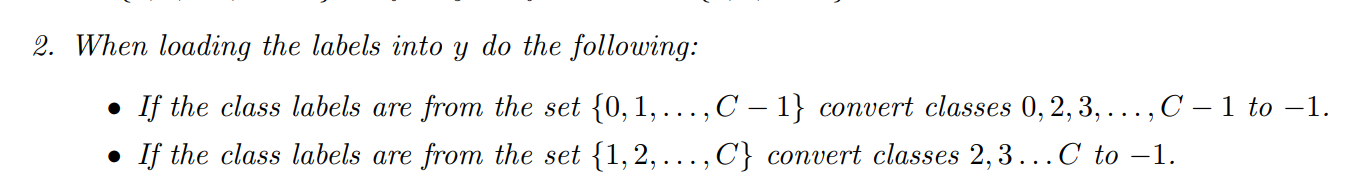

In [29]:
n = wine. data . shape [0] # Number of data points
d = wine. data . shape [1] # Dimension of data points
#In the following code , we create a nx1 vector of target labels
y = 1.0* np . ones ([ A.shape[0] ,])

for i in range ( wine.target.shape[0]) :
  if wine.target[i] != 1:
    y[i]=-1
  else:
    y[i]=1
print(y)
print(len(y))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
178


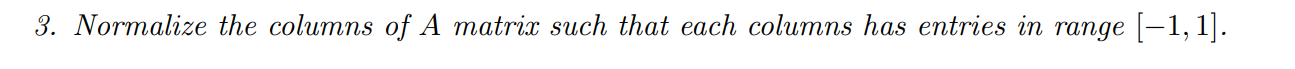

In [30]:
#Normalization of columns of A
for j in range (A.shape[1]) :
  a=abs(( A[: , j ]))
  A [: , j ] = A[: , j ]/ max(a)
print(A)

[[0.95954147 0.29482759 0.75232198 ... 0.60818713 0.98       0.63392857]
 [0.89008766 0.30689655 0.6625387  ... 0.61403509 0.85       0.625     ]
 [0.88739042 0.40689655 0.82662539 ... 0.60233918 0.7925     0.70535714]
 ...
 [0.89480782 0.73793103 0.6996904  ... 0.34502924 0.39       0.49702381]
 [0.88806473 0.44655172 0.73374613 ... 0.35087719 0.405      0.5       ]
 [0.95279838 0.70689655 0.84829721 ... 0.35672515 0.4        0.33333333]]


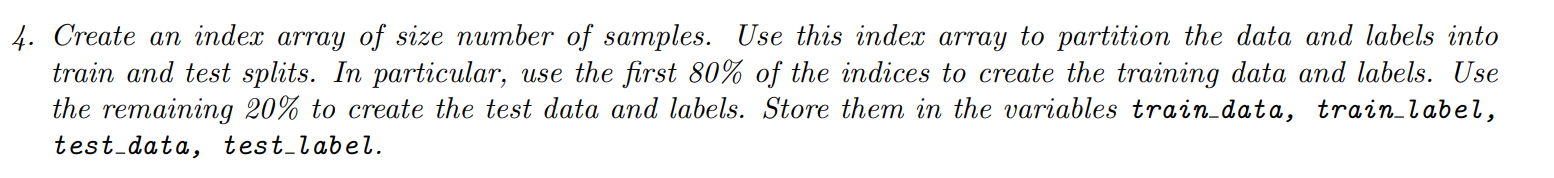

In [31]:
# Create an index array
indexarr = np.arange ( n ) # index array

np.random.shuffle(indexarr) # shuffle the indices

# check indexarr after shuffling
print('index_array:',indexarr)
B=[[] for _ in range(A.shape[0])]
Y=1.0* np . ones ([ A . shape [0] ,])
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
for i in range(A.shape[0]):
  j=indexarr[i]
  B[i]=A[j].tolist()
  Y[i]=y[j]

# train_label=1.0*np.ones([per])
# test_label=1.0*np.ones([30])
# train_data=[[] for _ in range(per)]
# test_data=[[] for _ in range(30)]
# print(train_data))
# for i in range(150):
#   if i<per:
#     train_data[i]=(A[indexarr[i]])
#     train_label[i]=y[indexarr[i]]
#   if i>=per:
#     test_label[i-per]=y[indexarr[i]]
#     test_data[i-per]=(A[indexarr[i]])
per=int(0.8*len(B))
print(per)

train_data=np.array(B[:per])
test_data=np.array(B[per:])
train_label=Y[:per]
test_label=Y[per:]
print(f'train_data: {train_data.shape}')
print(f'train_label: {train_label.shape}')
print(f'test_data: {test_data.shape}')
print(f'test_label: {test_label.shape}')

index_array: [ 34  90  55  95 170 112   7  86  36 144  96 111 157 164 175 109  80 140
  53 106 104  18  73  45  17  93 110  82 118  99  28  85  77  40  68  91
  20  79  24  29 124   0  42 176  26  47  41  44 125 173  10 151  88 154
 138 103  64 141 161 129  65   5 165 120 121 172 100  61  70 166 135  98
  83 177  89  37 134 142 156  12 148  19  74 169  35  33 147  60 155 167
 131  21   2  49  97 163 114  15 139  59  76 113  38  56  54 126 123  75
 128 122  51  30  39 171  22 150 116  94 143 119 137  25  63 130  67  87
   4   6  48  14  52  46  31  58 127 174  78 107   9 108 160   3   1 146
  57  81 153 133 152  23  27  72  84 158  13 132 105  32  43 162 115 145
 102  71  62  50 149 168  11  66  69 136   8 117  16 159 101  92]
142
train_data: (142, 13)
train_label: (142,)
test_data: (36, 13)
test_label: (36,)


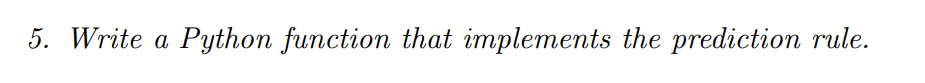

In [32]:
def predict(w,x):
  predict=[]
  for i in range(x.shape[0]):
    wx=w@x[i]
    a=(np.sign(wx))
    if a>=0:# assumption: we assume for 0 it is 1 its depend on us that for which value we are biased
      predict.append(1)
    else:
      predict.append(-1)
  return predict

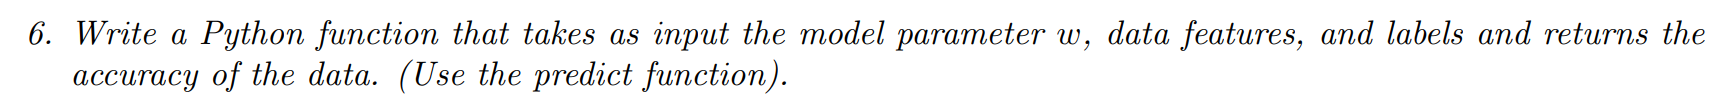

In [33]:
def compute_accuracy(data,labels,model_w):
  predicted_value=predict(model_w,data)
  count_true=0
  count_false=0
  for i in range(len(labels)):
    if predicted_value[i] == labels[i]:
      count_true+=1
    else:
      count_false+=1
  accuracy=(count_true/len(labels))
  return accuracy


##Ques-2 Start:


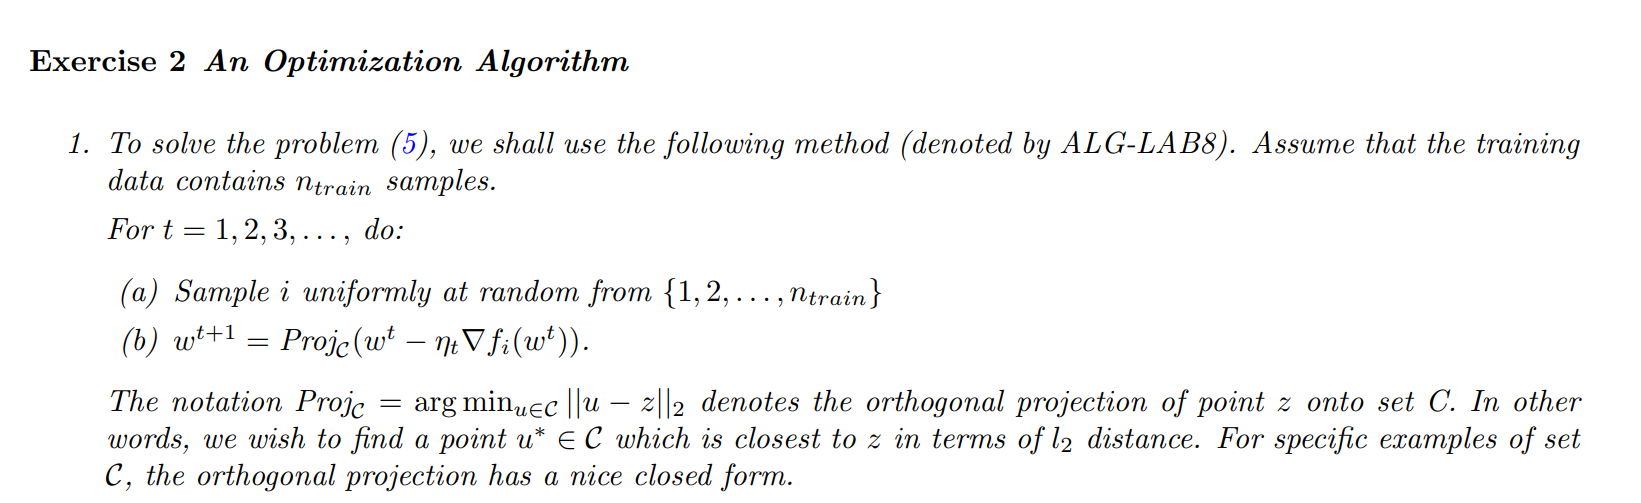

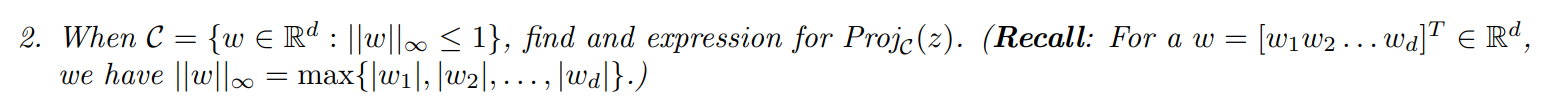

##Expression for Projection:



To find the projection of $ z $ onto the set $ C $, we need to minimize the distance between $ z $ and any point $ w $ in $ C $, subject to the constraint that $ w $ lies within the set $ C $.

Given that $ C = \{w \in \mathbb{R}^d : ||w||_\infty \leq 1\} $, where $ ||w||_\infty $ is the maximum absolute value of the components of $ w $, the projection $ \text{Proj}_C(z) $ can be found as follows:

For each component $ w_i $ of $ w $:
- If $ z_i $ is within the range $[-1, 1]$, then $ \text{Proj}_C(z)_i = z_i $, because $ z_i $ is already within the bounds of $ C $.
- If $ z_i $ is greater than 1, then $ \text{Proj}_C(z)_i = 1 $, because 1 is the maximum value allowed in $ C $.
- If $ z_i $ is less than -1, then $ \text{Proj}_C(z)_i = -1 $, because -1 is the minimum value allowed in $ C $.

So, the expression for $ \text{Proj}_C(z) $ is:

$
\text{Proj}_C(z)_i = \begin{cases}
z_i & \text{if } |z_i| \leq 1 \\
1 & \text{if } z_i > 1 \\
-1 & \text{if } z_i < -1
\end{cases}
$
This expression applies to each component $ i $ of $ z $. Thus, $ \text{Proj}_C(z) $ is obtained by applying this rule to each component of $ z $.


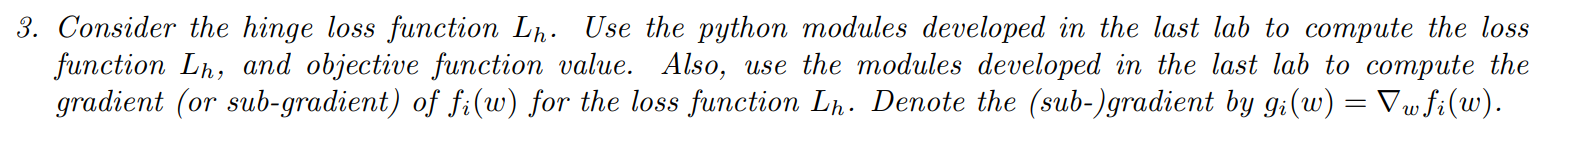

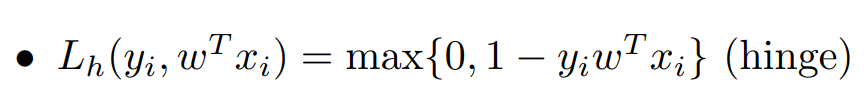

To rewrite the optimization problem
$
\min_{w \in \mathbb{R}^d}
 f(w) = \frac{\lambda}{2} ||w||_2^2 + \frac{1}{n} \sum_{i=1}^{n} L(y_i, w^T x_i)
$
as
$
\min_{w} \sum_{i=1}^{n} f_i(w)
$

Find an appropriate choice of $f_i(w)$, where

$
f_i(w) = \frac{\lambda}{2n} ||w||_2^2 + L(y_i, w^T x_i)/n
$

Here, $L(y_i, w^T x_i)$ is the loss function applied to the $i$-th data point. The summation over $i$ will then represent the average loss over the entire dataset. Therefore, the optimization problem becomes
$
\min_{w} \sum_{i=1}^{n} f_i(w) = \min_{w} \sum_{i=1}^{n} \left( \frac{\lambda}{2n} ||w||_2^2 + L(y_i, w^T x_i) /n\right)
$


This form allows us to treat each individual data point's loss term separately, which can be useful for certain optimization algorithms.


To compute the gradient of $ f_i(w) $ for the hinge loss function $ L_h(y_i, w^T x_i) $, let's first find the derivative of $ L_h $ with respect to $ w^T x_i $, denoted as $ L'_h $:

$L'_h(y_i, w^T x_i) = \frac{\partial L_h}{\partial (w^T x_i)} = \begin{cases} -y_i & \text{if } 1 - y_i w^T x_i > 0 \\ 0 & \text{otherwise} \end{cases} $

Now, let's compute the gradient of $ f_i(w) $ with respect to $ w $, denoted as $ g_i(w) $:

$g_i(w) = \frac{\partial f_i/}{\partial w} =\lambda/n \cdot( w )+ L'_h(y_i, w^T x_i) \cdot x_i/n $


In [34]:
def hinge(x,y,w):
  hinge= np.maximum(0,1-y*(w@x))
  return hinge

In [35]:
def compute_objective(X,y,w,lamda):
  n=X.shape[0]
  loss=0
  for i in range(n):
    x_i=X[i]
    y_i=y[i]
    margin = hinge(x_i,y_i,w)
    if margin > 0:

        loss=loss+margin
  reg_term=(lamda/2)*((np.linalg.norm(w))**2)
  obj_value=reg_term+loss/n
  return obj_value

In [36]:
def compute_gradient_hinge_loss(x_i, y_i, w, lambda_val,n):

    margin = 1 - y_i *( w@x_i)
    if margin >= 0:
        loss_gradient = -y_i*x_i
    else:
        loss_gradient = 0
    regularization_gradient = (1/n)*lambda_val * w
    gradient = regularization_gradient + loss_gradient/n
    return gradient


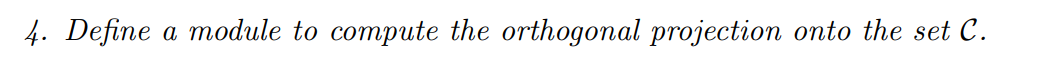

In [37]:
# def max_norm(z):
#   norm_w=[]
#   for i in z:
#     mod_value=abs(i)
#     norm_w.append(mod_value)
#   max_value=max(norm_w)
#   return max_value
def projec(z):
  new_z=[]
  for i in z:
    if abs(i)<=1:
      new_z.append(i)
    if i>1:
      new_z.append(1.0)
    if i<-1:
      new_z.append(-1.0)
  return np.array(new_z)
z=[1,0,0.9,6.9,-9.8]
projec(z)

array([ 1. ,  0. ,  0.9,  1. , -1. ])

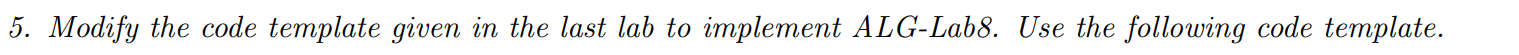

In [38]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .zeros(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*compute_gradient_hinge_loss(X[i], y[i], w, lamda,n)
      w=projec(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(compute_objective(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

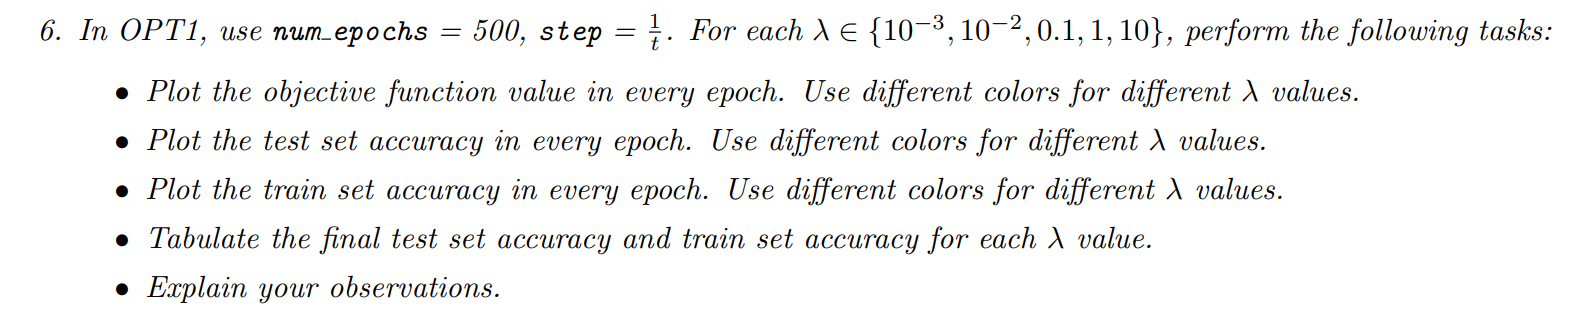

In [39]:
import matplotlib.pyplot as plt
data= train_data
y=train_label
# print(y)
num_echos=500

[0.9892088427104645, 0.9880033437462336, 0.9873114733711287, 0.9868258929197281, 0.9864545694017002, 0.9861508316647167, 0.9858901031665623, 0.9856690712171813, 0.9854737962006698, 0.9853015486677654, 0.9851434862157343, 0.9850012686924117, 0.9848706460002598, 0.9847480311941466, 0.9846340067450751, 0.9845278395196116, 0.9844270207801941, 0.9843331610373639, 0.9842444834209332, 0.9841597148772832, 0.9840789669067864, 0.9840019071802794, 0.983928973412706, 0.9838587777692734, 0.983791368005892, 0.9837262115911638, 0.9836634094292712, 0.9836036084877577, 0.9835457398942198, 0.9834896764769026, 0.9834357378770466, 0.9833832397094753, 0.9833321950349199, 0.9832829244455439, 0.9832349510218849, 0.9831883252023687, 0.9831428005864777, 0.983098744029084, 0.9830557738976519, 0.9830138646511334, 0.9829730660087589, 0.9829333176028656, 0.982894287157844, 0.9828562492965888, 0.9828190872861461, 0.9827827397260197, 0.982747188645089, 0.982712415373796, 0.9826783809560541, 0.9826450020003895, 0.982

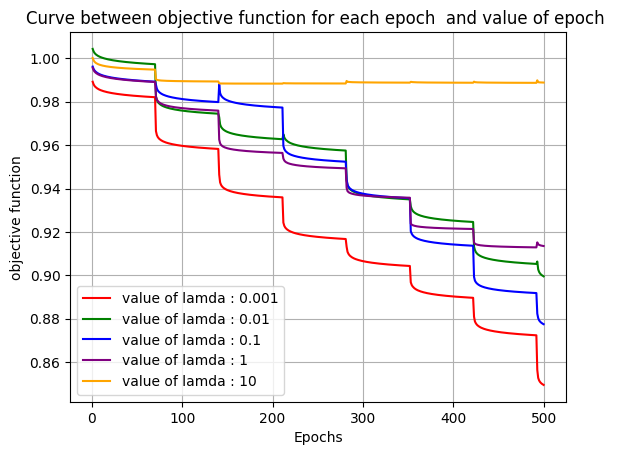

In [40]:
lamda1=OPT1(data,y,0.001,num_echos)[1]
lamda2=OPT1(data,y,0.01,num_echos)[1]
lamda3=OPT1(data,y,0.1,num_echos)[1]
lamda4=OPT1(data,y,1,num_echos)[1]
lamda5=OPT1(data,y,10,num_echos)[1]
print(lamda1)
plt.plot([i for i in range(1,501)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('objective function')
plt.title('Curve between objective function for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

The provided `OPT1` function implements an optimization algorithm using stochastic gradient descent (SGD) to minimize the objective function, which consists of the hinge loss and a regularization term. Through a series of epochs, the function iterates over the training data, updating the weight vector based on the computed gradient of the hinge loss function for each data point. The use of an adaptive learning rate, inversely proportional to the iteration count, aids in stabilizing the optimization process and adjusting the step size as training progresses. Shuffling the data points at each epoch prevents the model from overfitting to the order of the data, promoting better generalization. Tracking the objective function and accuracy on both the training and test datasets provides valuable insights into the convergence behavior and generalization performance of the model. Furthermore, the function's flexibility allows for experimentation with different regularization parameters and optimization strategies, making it suitable for fine-tuning

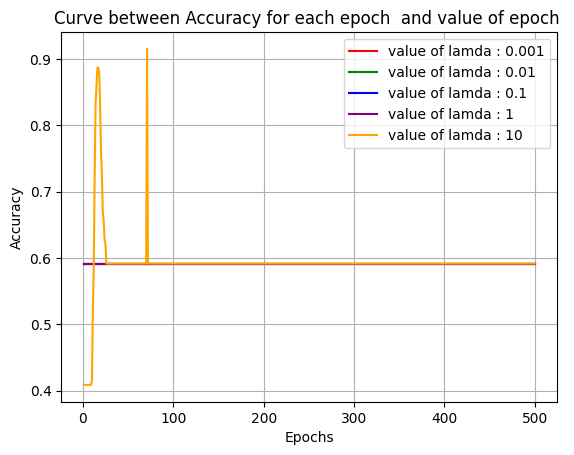

In [41]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3]
lamda2=OPT1(data,y,0.01,num_echos)[3]
lamda3=OPT1(data,y,0.1,num_echos)[3]
lamda4=OPT1(data,y,1,num_echos)[3]
lamda5=OPT1(data,y,10,num_echos)[3]
plt.plot([i for i in range(1,501)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


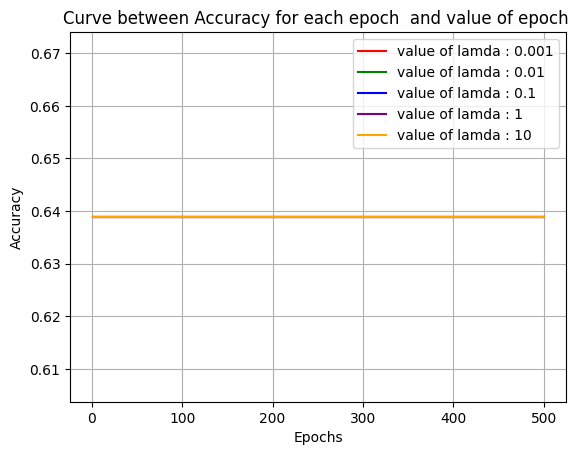

In [42]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4]
lamda2=OPT1(data,y,0.01,num_echos)[4]
lamda3=OPT1(data,y,0.1,num_echos)[4]
lamda4=OPT1(data,y,1,num_echos)[4]
lamda5=OPT1(data,y,10,num_echos)[4]
plt.plot([i for i in range(1,501)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

Observations:

Effect of Regularization on Objective Function Value: As λ increases, the objective function value might decrease because higher regularization penalizes larger weights, leading to a simpler model.
Conversely, for smaller λ values, the objective function value might increase as the model might overfit the training data. As it has been observed that for $\lambda$ = 10, the objective function value is decreasing rapidly.


Higher λ values may result in lower train set accuracy but better generalization, leading to higher test set accuracy. This indicates better performance on unseen data.

Convergence Speed: Higher λ values might lead to faster convergence as the model avoids fitting to noise in the data. Conversely, smaller λ values might lead to slower convergence or even oscillation around the optimal solution, especially if the data is noisy or the model is complex.
 Sensitivity to Learning Rate (η): The choice of learning rate (η) is crucial. Too small a learning rate might result in slow convergence, while too large a learning rate might cause the optimization process to diverge. for which we have taken η to be 1/t.

In [43]:
from prettytable import PrettyTable

In [44]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3][-1]
lamda2=OPT1(data,y,0.01,num_echos)[3][-1]
lamda3=OPT1(data,y,0.1,num_echos)[3][-1]
lamda4=OPT1(data,y,1,num_echos)[3][-1]
lamda5=OPT1(data,y,10,num_echos)[3][-1]
accuracy_train=[]
accuracy_train.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [45]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4][-1]
lamda2=OPT1(data,y,0.01,num_echos)[4][-1]
lamda3=OPT1(data,y,0.1,num_echos)[4][-1]
lamda4=OPT1(data,y,1,num_echos)[4][-1]
lamda5=OPT1(data,y,10,num_echos)[4][-1]
accuracy_test=[]
accuracy_test.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [46]:
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',accuracy_train[0],accuracy_test[0]])
table.add_row(['0.01',accuracy_train[1],accuracy_test[1]])
table.add_row(['0.1',accuracy_train[2],accuracy_test[2]])
table.add_row(['1',accuracy_train[3],accuracy_test[3]])
table.add_row(['10',accuracy_train[4],accuracy_test[4]])
print(table)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5915492957746479 | 0.6388888888888888 |
|      0.01     | 0.5915492957746479 | 0.6388888888888888 |
|      0.1      | 0.5915492957746479 | 0.6388888888888888 |
|       1       | 0.5915492957746479 | 0.6388888888888888 |
|       10      | 0.5915492957746479 | 0.6388888888888888 |
+---------------+--------------------+--------------------+


By visualisation of graph we can see that the accuracy for training data increases and decreases for different values of epochs , From graphs it is seen that it is not necessary that for large epoch we get high accuracy , their is no fix epoch for a particular lamda where we got maximum accuracy but for some lamdas it is converging to a particular lambda which is lambda = 10 and from table we cannot say that the  final value is maximum value because in between their is some values which is greater than final therefore irregularties in graph is observed here we got maximum accuracy for lambda 10 in both test and training data set.So here we can conclude that as we increse lambdas accuracy increases which we can clearly see from table
#Note: ##
 It is not necessary that every time we got same accuracy value because we are using stochastic  gradient descent in which we randomly choose coordinates and updated them therefore when runing multiple times we are getting different results thats why we are getting different curves every time .

##With Stoppoing Crieteria:

In [68]:
#Train Data

In [77]:
data=train_data
y_label=train_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500

In [78]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*compute_gradient_hinge_loss(X[i], y[i], w, lamda,n)
      w=projec(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(compute_objective(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [79]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
best_val_accuracy: 0.4154929577464789
epoch is: 366
..........................................................................
best_val_accuracy: 0.44366197183098594
epoch is: 367
..........................................................................
best_val_accuracy: 0.45774647887323944
epoch is: 368
..........................................................................
best_val_accuracy: 0.4788732394366197
epoch is: 369
..........................................................................
best_val_accuracy: 0.5070422535211268
epoch is: 370
..........................................................................
best_val_accuracy: 0.5352112676056338
epoch is: 371
..........................................................................
best_val_accuracy: 0.5492957746478874
epoch is: 373
...........................................................

In [85]:
#Test data
data=test_data
y_label=test_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500

In [86]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
best_val_accuracy: 0.4722222222222222
epoch is: 356
..........................................................................
best_val_accuracy: 0.6388888888888888
epoch is: 357
..........................................................................
best_val_accuracy: 0.6944444444444444
epoch is: 358
..........................................................................
best_val_accuracy: 0.7222222222222222
epoch is: 360
..........................................................................
best_val_accuracy: 0.7777777777777778
epoch is: 361
..........................................................................
best_val_accuracy: 0.8055555555555556
epoch is: 362
..........................................................................
overall best value of accuracy: 0.8055555555555556


In [98]:
#TRain Data
data=train_data
y_label=train_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
best_val_accuracy: 0.4154929577464789
epoch is: 356
..........................................................................
best_val_accuracy: 0.4647887323943662
epoch is: 357
..........................................................................
best_val_accuracy: 0.5422535211267606
epoch is: 358
..........................................................................
best_val_accuracy: 0.6197183098591549
epoch is: 359
..........................................................................
best_val_accuracy: 0.6338028169014085
epoch is: 360
..........................................................................
best_val_accuracy: 0.6830985915492958
epoch is: 367
..........................................................................
best_val_accuracy: 0.704225352112676
epoch is: 368
..............................................................

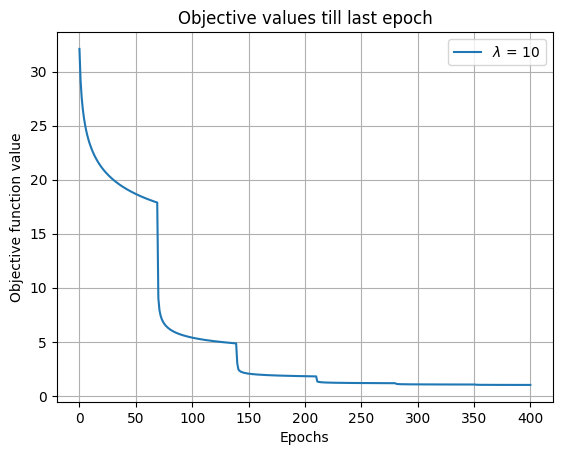

In [96]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

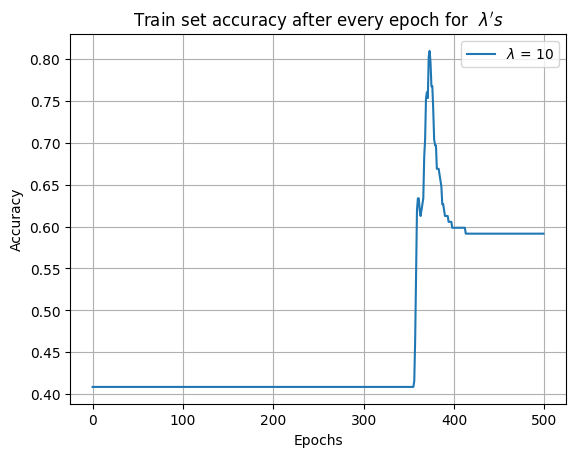

In [99]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

In [102]:
#Test Data
data=test_data
y_label=test_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
best_val_accuracy: 0.3888888888888889
epoch is: 389
..........................................................................
best_val_accuracy: 0.4444444444444444
epoch is: 390
..........................................................................
best_val_accuracy: 0.5
epoch is: 393
..........................................................................
best_val_accuracy: 0.5277777777777778
epoch is: 396
..........................................................................
best_val_accuracy: 0.5555555555555556
epoch is: 397
..........................................................................
best_val_accuracy: 0.5833333333333334
epoch is: 398
..........................................................................
best_val_accuracy: 0.6388888888888888
epoch is: 400
..........................................................................
b

 the orthogonal projection itself does not directly lead to increased accuracy, its role in stabilizing optimization and preventing overfitting can indirectly contribute to improved model performance and accuracy. However, the effectiveness of the projection depends on the specific constraints and characteristics of the optimization problem and the dataset.

image.png




image.png

We know that $f_i(w)$ is where $L$ is $L_i$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)$$


We know that $f_i(w)$ is where $L$ is $L_{sh}$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)$$


In [54]:
#Logistic
def logistic_loss(x,y,w):
  loss=np.log(1+np.exp(-y*(w@x)))
  return loss
def logistic_objective_function(x,y,w,lamda):
  n=x.shape[0]
  loss=0
  for i in range(n):
    loss=loss+logistic_loss(x[i],y[i],w)
  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj=reg_term+loss/n
  return obj


In [55]:
#squared hinge
def squared_loss(x,y,w):
  z=y*(w@x)
  loss= max(0,1-z)
  return loss**2
def squared_objective_function(x,y,w,lamda):
  n=x.shape[0]
  loss=0
  for i in range(n):
    loss=loss+squared_loss(x[i],y[i],w)
  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj=reg_term+loss/n
  return obj

The logistic loss function $L_l$ is given by:
$$
L_l\left(y, w^T x\right)=\log \left(1+\exp \left(-y w^T x\right)\right)
$$

To compute the gradient (or subgradient) of $L_l$ with respect to the weight vector $w$, applying the chain rule, we have:
$$
\frac{\partial L_l}{\partial w}= \frac{1}{1+\exp \left(-y w^T x\right)}\frac{∂\exp(-yw^Tx)}{∂w} = \frac{-yx\exp(-yw^Tx)}{1+\exp \left(-y w^T x\right)}
$$

We can simplify this to:
$$
\nabla_w L_l\left(y, w^T x\right)=-y x \frac{1}{1+\exp \left(y w^T x\right)}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)) =  \frac{\lambda w}{n} + \frac{-yx}{n(1+exp(yw^Tx))}
$$


The squared hinge loss function $L_{s h}$ is given by:
$$
L_{s h}\left(y, w^T x\right)=\left(\max \left(0,1-y w^T x\right)\right)^2
$$

The gradient (or subgradient) of $L_{s h}$ with respect to the weight vector $w$ can be calculated as follows:

$$
\nabla_w L_{sh}\left(y, w^T x\right)=
\begin{cases}
-2(1-yw^Tx)(yx) & \text { if } 1-yw^Tx \geq 0 \\
0 & \text{ if } 1-yw^Tx < 0
\end{cases}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)) =  \begin{cases} \frac{\lambda w}{n} + \frac{-2(1-yw^Tx)(yx)}{n} & \text { if } 1-yw^Tx \geq 0 \\
 \frac{\lambda w}{n} & \text { if } 1-yw^Tx < 0
\end{cases}
$$


In [104]:
def logistic_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  loss_term=(1/n)*y*x*(1/(1+np.exp(y*(w@x))))
  return reg_term-loss_term
def squared_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  z=y*(w@x)
  grad=0
  if (1-z)>0:
    grad=-2*(1-z)*y*x
  gradient=reg_term+grad/n
  return gradient

In [105]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*logistic_gradient(X[i], y[i], w, lamda,n)
      w=projec(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(logistic_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [106]:
#Test data
data=test_data
y_label=test_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500

In [107]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.3611111111111111
epoch: 400
*************************************************************************
overall best value of accuracy: 0.3611111111111111


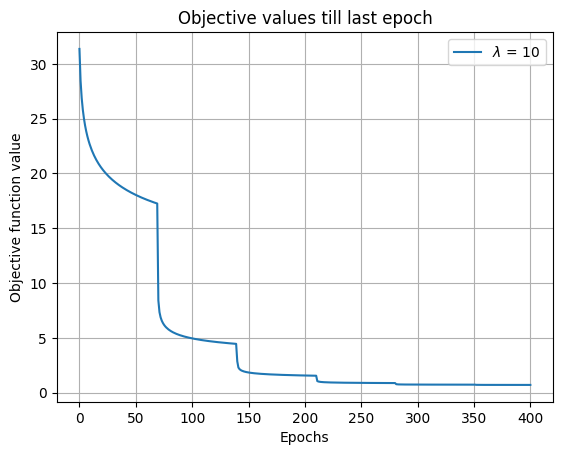

In [108]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

In [110]:
#TRain Data
data=train_data
y_label=train_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.4084507042253521
epoch: 400
*************************************************************************
overall best value of accuracy: 0.4084507042253521


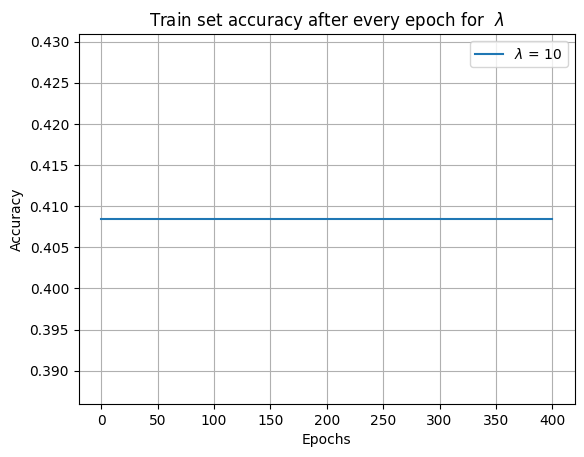

In [111]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

In [113]:
#Test Data
data=test_data
y_label=test_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.3611111111111111
epoch: 400
*************************************************************************
overall best value of accuracy: 0.3611111111111111


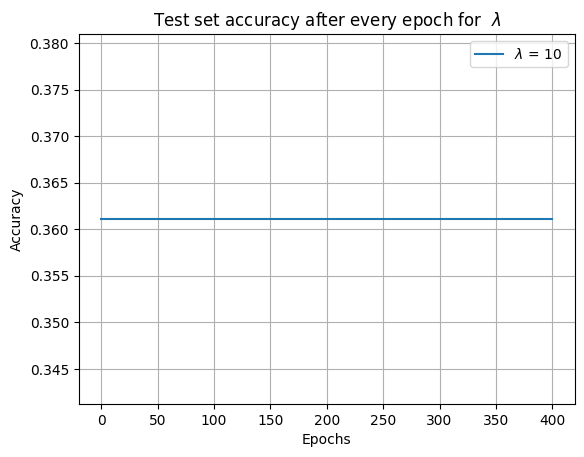

In [114]:
#test accuracy
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

IN logistic we get very low accuracy for lamda=10 in above we are getting better

#Squared Loss

In [115]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*squared_gradient(X[i], y[i], w, lamda,n)
      w=projec(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(squared_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [118]:
#TRain Data
data=train_data
y_label=train_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
best_val_accuracy: 0.44366197183098594
epoch is: 214
..........................................................................
best_val_accuracy: 0.5
epoch is: 215
..........................................................................
best_val_accuracy: 0.5563380281690141
epoch is: 216
..........................................................................
best_val_accuracy: 0.6056338028169014
epoch is: 217
..........................................................................
best_val_accuracy: 0.6126760563380281
epoch is: 221
..........................................................................
best_val_accuracy: 0.6267605633802817
epoch is: 222
..........................................................................
best_val_accuracy: 0.647887323943662
epoch is: 229
..........................................................................
b

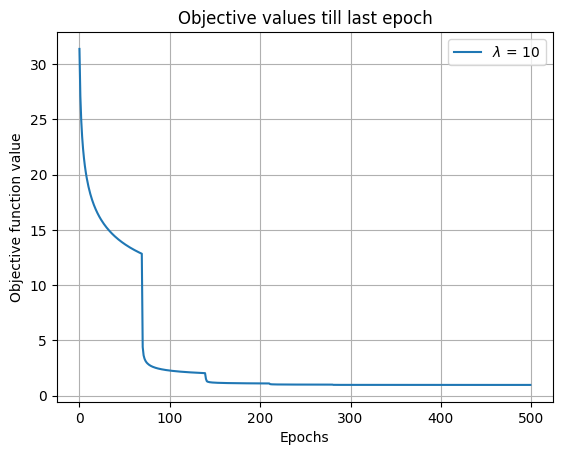

In [119]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

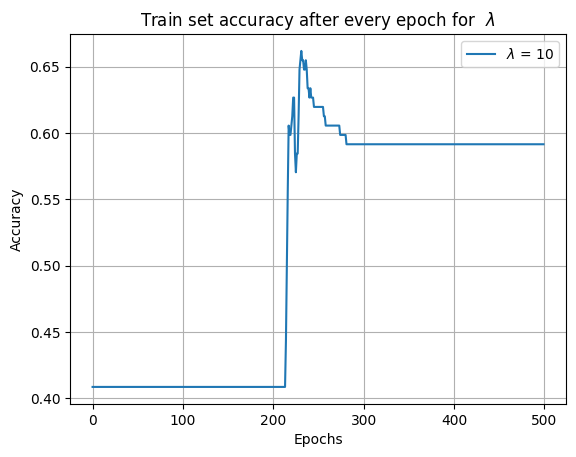

In [120]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

In [121]:
#Test Data
data=test_data
y_label=test_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
best_val_accuracy: 0.6388888888888888
epoch is: 211
..........................................................................
best_val_accuracy: 0.6666666666666666
epoch is: 492
..........................................................................
overall best value of accuracy: 0.6666666666666666


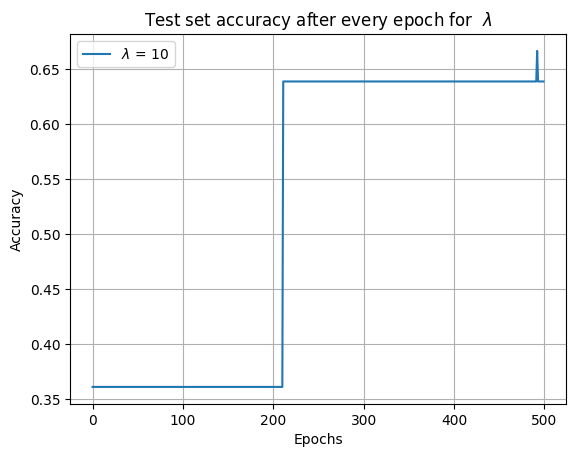

In [122]:
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

As epoch cahnges we are getting better accuracy by running multiple times we are getting different accuracy in some cases we got better percent accuracy for training data set in squared loss (or hinge) and in case of test we much better  percent accuracy therefore this method works very well in case of squared loss and hinge loss but in logistic loss we got some less accuracy as compare to othes .the orthogonal projection onto a set helps in optimization problems by ensuring that the solutions remain within a feasible region defined by the constraints on the parameters (e.g., bounded region, non-negativity constraints, bounded norm constraints).
Generally we got train accuracy better(greater than 65 percent) than test accuracy(greater than 60)  which shows that we are predicted good whereas in case of  logistic we are not getting better results in this projection method.
The value of accuracy and curves also depends on what are the values we are taken therefore we take intial value within the set we got different curves and starting value of objective function , IN above this Ques I have used intial values as array of ones and zeroes .